

1. **Can we use Bagging for regression problems?**
  - Yes, Bagging can be used for regression by averaging predictions from multiple models.

2. **Difference between multiple model training and single model training**
  - Single model training uses one learner, while multiple model training combines several models to improve performance.

3. **Concept of feature randomness in Random Forest**
  - Random Forest selects a random subset of features at each split to reduce correlation among trees.

4. **What is OOB (Out-of-Bag) Score?**
   - OOB score is the accuracy calculated using samples not included in bootstrap training.

5. **How to measure feature importance in Random Forest**
   - Feature importance is measured by the decrease in impurity or drop in model accuracy when a feature is permuted.

6. **Working principle of a Bagging Classifier**
   - Bagging trains multiple models on bootstrapped datasets and predicts by majority voting.

7. **How do you evaluate a Bagging Classifier’s performance?**
  - Using metrics like accuracy, precision, recall, F1-score, or OOB score.

8. **How does a Bagging Regressor work?**
  - It trains multiple regressors on bootstrapped samples and averages their predictions.

9. **Main advantage of ensemble techniques**
  - They improve accuracy and reduce overfitting compared to single models.

10. **Main challenge of ensemble methods**
  -  They increase computational cost and reduce model interpretability.

11. **Key idea behind ensemble techniques**
 -   Combining multiple weak or strong models leads to better overall performance.

12. **What is a Random Forest Classifier?**
  -  It is an ensemble of decision trees built using bagging and feature randomness.

13. **Main types of ensemble techniques**
  -  Bagging, Boosting, and Stacking.

14. **What is ensemble learning in machine learning?**
  -  Ensemble learning combines multiple models to make more accurate predictions.

15. **When should we avoid using ensemble methods?**
 -   When data is small or model simplicity and interpretability are required.

16. **How does Bagging help in reducing overfitting?**
 -   It reduces variance by training models on different bootstrap samples.

17. **Why is Random Forest better than a single Decision Tree?**
  -  It reduces overfitting and improves accuracy through averaging many trees.

18. **Role of bootstrap sampling in Bagging**
   - It creates diverse training datasets by sampling with replacement.

19. **Real-world applications of ensemble techniques**
   - Used in fraud detection, stock prediction, medical diagnosis, and recommendation systems.

20. **Difference between Bagging and Boosting**
   - Bagging reduces variance using parallel models, while Boosting reduces bias using sequential learning.




In [55]:
#Q.21) Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
X = df_iris.drop('target', axis=1)
y = df_iris['target']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)
dt_clf1 = DecisionTreeClassifier()
dt_clf2 = DecisionTreeClassifier(max_depth=1)
dt_clf3 = DecisionTreeClassifier(max_depth=2)

# Corrected: Changed 'estimator' to 'estimators'
ensemble_clf= VotingClassifier(estimators=[("Decision tree 1",dt_clf1),("Decision tree 2",dt_clf2 ),('Decision Tree 3',dt_clf3)] )
ensemble_clf.fit(X_train,y_train)

y_pred= ensemble_clf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [56]:
#Q.22) Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # Changed accuracy_score to mean_squared_error
import pandas as pd

iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
X = df_iris.drop('target', axis=1)
y = df_iris['target']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)
dt_rg1 = DecisionTreeRegressor()
dt_rg2 = DecisionTreeRegressor(max_depth=1)
dt_rg3 = DecisionTreeRegressor(max_depth=2)

# Corrected: Changed 'estimator' to 'estimators'
ensemble_clf= VotingRegressor(estimators=[("Decision tree 1",dt_rg1),("Decision tree 2",dt_rg2 ),('Decision Tree 3',dt_rg3)] )
ensemble_clf.fit(X_train,y_train)

y_pred= ensemble_clf.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")

Mean Squared Error: 0.025437968497955626


In [57]:
#Q.23 Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()
df_bc = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df_bc['target'] = breast_cancer_data.target
X= df_bc.drop('target', axis=1)
y= df_bc['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
new_rf_clf = RandomForestClassifier()
new_rf_clf.fit(X_train,y_train)

y_pred= new_rf_clf.predict(X_test)

for i,j in zip(breast_cancer_data.feature_names,new_rf_clf.feature_importances_):
    print(f'The feature importance of {i} is {j}')

The feature importance of mean radius is 0.014401970773632452
The feature importance of mean texture is 0.017960446807817977
The feature importance of mean perimeter is 0.07419989559498723
The feature importance of mean area is 0.05190019944365195
The feature importance of mean smoothness is 0.007633147349611119
The feature importance of mean compactness is 0.006152319784094225
The feature importance of mean concavity is 0.06348858420515548
The feature importance of mean concave points is 0.13262333900197237
The feature importance of mean symmetry is 0.004371458511905161
The feature importance of mean fractal dimension is 0.004723076163976675
The feature importance of radius error is 0.010734102908613525
The feature importance of texture error is 0.00625631931001833
The feature importance of perimeter error is 0.015126135560734945
The feature importance of area error is 0.03989412328016241
The feature importance of smoothness error is 0.0041150702855448145
The feature importance of com

In [58]:
#Q.24) Train a Random Forest Regressor and compare its performance with a single Decision Tree.
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # Changed accuracy_score to mean_squared_error
import pandas as pd

iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
X = df_iris.drop('target', axis=1)
y = df_iris['target']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)
dt_rg1 = DecisionTreeRegressor()
dt_rg2 = RandomForestRegressor()

dt_rg1.fit(X_train,y_train)
y1_pred = dt_rg1.predict(X_test)

dt_rg2.fit(X_train,y_train)
y2_pred = dt_rg2.predict(X_test)

print(f"Mean Squared Error for Decision Tree: {mean_squared_error(y_test,y1_pred)}")
print(f"Mean Squared Error for Random Forest: {mean_squared_error(y_test,y2_pred)}")

Mean Squared Error for Decision Tree: 0.0
Mean Squared Error for Random Forest: 0.0012400000000000009


In [59]:
#Q.25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.
dt_rg2 = RandomForestRegressor(oob_score=True)
dt_rg2.fit(X_train,y_train)
y2_pred = dt_rg2.predict(X_test)

print(f"Out-of-Bag Score: {dt_rg2.oob_score_}")

Out-of-Bag Score: 0.9108105027300227


In [60]:
#Q.26.  Train a Bagging Classifier using SVM as a base estimator and print accuracy.

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
X = df_iris.drop('target', axis=1)
y = df_iris['target']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)
dt_clf1 = SVC(kernel='linear')

ensemble_clf= BaggingClassifier(estimator= dt_clf1 )
ensemble_clf.fit(X_train,y_train)

y_pred= ensemble_clf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [61]:
#Q.27) Train a Random Forest Classifier with different numbers of trees and compare accuracy.

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_estimators_list = [10, 50, 100, 200, 500]

for i in n_estimators_list:
    rf_clf = RandomForestClassifier(n_estimators=i, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {i} trees: {accuracy}")


Accuracy for 10 trees: 1.0
Accuracy for 50 trees: 1.0
Accuracy for 100 trees: 1.0
Accuracy for 200 trees: 1.0
Accuracy for 500 trees: 1.0


In [62]:
#Q.28) Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd

iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
X = df_iris.drop('target', axis=1)
y = df_iris['target']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)
dt_clf1 = LogisticRegression(max_iter=1000) # Increased max_iter for convergence if needed

ensemble_clf= BaggingClassifier(estimator= dt_clf1 )
ensemble_clf.fit(X_train,y_train)

y_pred_proba = ensemble_clf.predict_proba(X_test) # Changed to predict_proba
print(f"AUC Score: {roc_auc_score(y_test, y_pred_proba, multi_class='ovr')}")

AUC Score: 1.0


In [63]:
#Q.29)Train a Random Forest Regressor and analyze feature importance scores
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

dia = load_diabetes()
df_dia = pd.DataFrame(dia.data, columns=dia.feature_names)
df_dia['target'] = dia.target
X7 = df_dia.drop('target', axis=1)
y7 = df_dia['target']

X7_train, X7_test, y7_train, y7_test= train_test_split(X7,y7, test_size=0.3, random_state=42)
dt_rg2 = RandomForestRegressor()


dt_rg2.fit(X7_train,y7_train)
y7_pred = dt_rg2.predict(X7_test)

for i,j in zip(dia.feature_names,dt_rg2.feature_importances_):
  print(f"The feature Importance of {i} is {j}")

The feature Importance of age is 0.06124425727189294
The feature Importance of sex is 0.009846008284236988
The feature Importance of bmi is 0.367989592943954
The feature Importance of bp is 0.11252410449639302
The feature Importance of s1 is 0.05099808950563478
The feature Importance of s2 is 0.054166197994537035
The feature Importance of s3 is 0.05885136407791225
The feature Importance of s4 is 0.031396897379599956
The feature Importance of s5 is 0.1890768985017849
The feature Importance of s6 is 0.06390658954405419


In [64]:
#Q.30) Train an ensemble model using both Bagging and Random Forest and compare accuracy.
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
data = sns.load_dataset('titanic')
data.drop(columns=['deck', 'embark_town'], inplace=True)

data['age'].fillna(data['age'].median(), inplace=True)


data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

for col in ['adult_male', 'alone']:
    data[col] = data[col].astype(int)

categorical_features = ['sex', 'embarked', 'class', 'who']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

X = data.drop(columns=['survived', 'alive'])
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train models
bg_clf = BaggingClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

bg_clf.fit(X_train, y_train)
bg_pred = bg_clf.predict(X_test)

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

# Compare accuracy
print(f"Accuracy of Bagging Classifier: {accuracy_score(y_test, bg_pred)}")
print(f"Accuracy of Random Forest Classifier: {accuracy_score(y_test, rf_pred)}")

/tmp/ipython-input-3501202249.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
/tmp/ipython-input-3501202249.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Accuracy of Bagging Classifier: 0.7873134328358209
Accuracy of Random Forest Classifier: 0.7910447761194029


In [65]:

#Q.31) Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

parameter = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 10, 20, 30]
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_clf, param_grid=parameter, cv= 5, scoring='accuracy')
grid_search.fit(X_train, y_train)

grid_pred = grid_search.predict(X_test)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}


In [66]:
#Q.32) Train a Bagging Regressor with different numbers of base estimators and compare performance.
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import root_mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

estimator =  [50, 100, 150, 200]
for i in estimator:
  bg_rssor = BaggingRegressor(n_estimators=i)
  bg_rssor.fit(X_train, y_train)
  bg_pred = grid_search.predict(X_test)
  print(f"RMSE of estimator {i} is {root_mean_squared_error(y_test, bg_pred)}")


RMSE of estimator 50 is 0.46520738434354325
RMSE of estimator 100 is 0.46520738434354325
RMSE of estimator 150 is 0.46520738434354325
RMSE of estimator 200 is 0.46520738434354325


In [67]:
#Q.34: Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
single_dt = DecisionTreeClassifier()
Bagging_clf = BaggingClassifier(estimator=single_dt)
Bagging_clf.fit(X_train, y_train)
y_pred = Bagging_clf.predict(X_test)
print(f"Accuracy of Bagging Classifier: {accuracy_score(y_test, y_pred)}")



Accuracy of Bagging Classifier: 0.8733333333333333


In [68]:
#Q.35Train a Random Forest Classifier and visualize the confusion matrix.

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)
c_matrix = confusion_matrix(y_test, rf_pred)

print("Confusion Matrix:")
print(c_matrix)


Confusion Matrix:
[[129  16]
 [ 27 128]]


In [69]:
#Q.37} Train a Random Forest Classifier and print the top 5 most important features
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)

for i,j in zip(data.feature_names[:5],clf_rf.feature_importances_[:5]):
  print(f"The feature Importance of {i} is {j}")

The feature Importance of mean radius is 0.032311888273301004
The feature Importance of mean texture is 0.011063901250175845
The feature Importance of mean perimeter is 0.060092333477412795
The feature Importance of mean area is 0.05381045367561502
The feature Importance of mean smoothness is 0.006223358550035776


In [70]:
#Q.38)Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

digits1= load_digits()
df_digits1 = pd.DataFrame(digits1.data, columns=digits1.feature_names)
df_digits1['target']= digits1.target
X= df_digits1.drop('target', axis=1)
y= df_digits1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagg_clf = BaggingClassifier(random_state=42)
bagg_clf.fit(X_train, y_train)
bagg_clf_pred = bagg_clf.predict(X_test)

precision = precision_score(y_test, bagg_clf_pred, average='weighted')
recall = recall_score(y_test, bagg_clf_pred, average='weighted')
f1 = f1_score(y_test, bagg_clf_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 0.9446
Recall: 0.9426
F1-score: 0.9427


In [71]:
#Q.39 Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

digits1= load_digits()
df_digits1 = pd.DataFrame(digits1.data, columns=digits1.feature_names)
df_digits1['target']= digits1.target
X= df_digits1.drop('target', axis=1)
y= df_digits1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

random_clf1 = RandomForestClassifier(max_depth=1 ,random_state=42)
random_clf1.fit(X_train, y_train)
random_clf1_pred = bagg_clf.predict(X_test)
print(f"Accuracy when Max Depth is 1: {accuracy_score(y_test, random_clf1_pred)}")

random_clf2 = RandomForestClassifier(max_depth=100 ,random_state=42)
random_clf2.fit(X_train, y_train)
random_clf2_pred = bagg_clf.predict(X_test)
print(f"Accuracy when Max Depth is 100: {accuracy_score(y_test, random_clf2_pred)}")

Accuracy when Max Depth is 1: 0.9425925925925925
Accuracy when Max Depth is 100: 0.9425925925925925


In [72]:
#Q.41 Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd

digits1= load_digits()
df_digits1 = pd.DataFrame(digits1.data, columns=digits1.feature_names)
df_digits1['target']= digits1.target
X= df_digits1.drop('target', axis=1)
y= df_digits1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


random_clf = RandomForestClassifier(max_depth=1 ,random_state=42)
random_clf.fit(X_train, y_train)
random_clf_pred_proba = random_clf.predict_proba(X_test)
print(f"ROC_AUC_SCORE: {roc_auc_score(y_test, random_clf_pred_proba, multi_class='ovr', average='weighted')}")

ROC_AUC_SCORE: 0.966236963162188


In [74]:
#Q.42: Train a Bagging Classifier and evaluate its performance using cross-validation.

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score # Added cross_val_score
from sklearn.ensemble import BaggingClassifier
import pandas as pd

digits1= load_digits()
df_digits1 = pd.DataFrame(digits1.data, columns=digits1.feature_names)
df_digits1['target']= digits1.target
X= df_digits1.drop('target', axis=1)
y= df_digits1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagg_clf = BaggingClassifier(random_state=42)
bagg_clf.fit(X_train, y_train)

#Cross Validation
cv_scores = cross_val_score(bagg_clf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")

Cross-validation scores: [0.875      0.86111111 0.91086351 0.92200557 0.86629526]


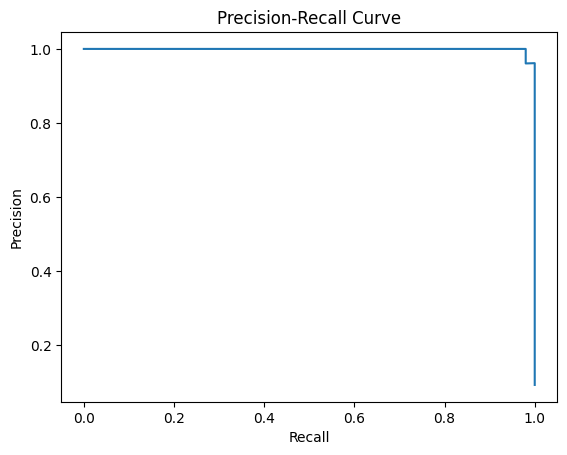

In [81]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
digits1 = load_digits()
df_digits1 = pd.DataFrame(digits1.data)
df_digits1['target'] = digits1.target

X = df_digits1.drop('target', axis=1)

y = (df_digits1['target'] == 1).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

random_clf1 = RandomForestClassifier(random_state=42)
random_clf1.fit(X_train, y_train)

random_clf1_pred = random_clf1.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, random_clf1_pred)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
